<a href="https://colab.research.google.com/github/parichayportfolio/FORE_BDA/blob/main/311036_DLNLP_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A. Call necessary libraries to build a NN model**

In [ ]:
import pandas as pd
import numpy as np
from  pathlib import Path


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
# Display multiple commands output from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

**B. Read data**

In [ ]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


**C. Explore the data using pandas**

In [ ]:
df.shape

(17000, 9)

In [ ]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

In [ ]:
# Checking NULL
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

***D. Spliting the data into X and y, where X is a set of predictors and y is the target***

In [ ]:
y = df.pop("median_house_value")
X = df

**E. Standardise dataset using StandardScaler**

In [ ]:
ss = StandardScaler()

In [ ]:
ss_fit = ss.fit_transform(X)

**F. Split dataset into train/test dataset**

In [ ]:
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
X_train.shape
X_test.shape

(12750, 8)

(4250, 8)

**G. Build a Neural Network model to make prediction of target**

In [61]:
model = tf.keras.Sequential()

In [62]:
model.add(layers.Input( shape = (8,) ) )

In [63]:
model.add(tf.keras.layers.Dense(25, activation = 'relu'))

In [64]:
model.add(tf.keras.layers.Dense(1, activation = 'relu'))

In [65]:
model.compile( loss = "mae")

In [66]:
model.fit(X,y, epochs = 100 )

Epoch 1/100
532/532 [==============================] - 2s 2ms/step - loss: 198565.2344
Epoch 2/100
532/532 [==============================] - 1s 2ms/step - loss: 161933.6719
Epoch 3/100
532/532 [==============================] - 1s 2ms/step - loss: 125180.4297
Epoch 4/100
532/532 [==============================] - 1s 2ms/step - loss: 117743.3594
Epoch 5/100
532/532 [==============================] - 1s 1ms/step - loss: 116940.4844
Epoch 6/100
532/532 [==============================] - 1s 2ms/step - loss: 116132.3906
Epoch 7/100
532/532 [==============================] - 1s 1ms/step - loss: 115275.9922
Epoch 8/100
532/532 [==============================] - 1s 1ms/step - loss: 114362.8359
Epoch 9/100
532/532 [==============================] - 1s 1ms/step - loss: 113391.7656
Epoch 10/100
532/532 [==============================] - 1s 2ms/step - loss: 112324.1328
Epoch 11/100
532/532 [==============================] - 1s 2ms/step - loss: 111186.2344
Epoch 12/100
532/532 [===================

In [67]:
from tensorflow.keras.utils import plot_model

In [68]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 25)                225       
                                                                 
 dense_8 (Dense)             (None, 1)                 26        
                                                                 
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


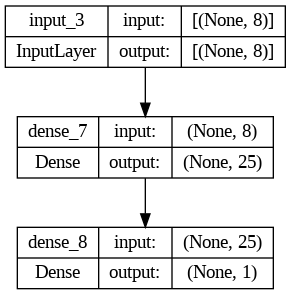

In [69]:
plot_model(model, show_shapes=True)

**G. Make predictions of test data using the model**

In [70]:
pred = model.predict(X_test)

133/133 [==============================] - 0s 1ms/step


In [74]:
xy=pred.flatten()

In [75]:
xy

array([168374.95, 193669.28, 195949.77, ..., 156593.52, 183530.66,
       173250.81], dtype=float32)

In [56]:
yy=y_test.values

In [58]:
yy

array([ 65500., 149900., 196300., ...,  84000., 152900., 139800.])

In [76]:
(xy==yy).sum()/len(yy)

0.0